主成分分析（PrincipalComponentAnalysis，PCA）是一种广泛应用的数
据降维方法，是非监督学习任务。

数据降维，即降低数据的维度，将原始高维特征空间中的点向一个低维空间投影，保留最重要的一些特征，去除噪声和不重要的特征，提升数据处理速度目的。


PCA的本质就是发现一些投影方向，使得数据在这些投影方向上的方差最
大，投影方向之间相互正交。


从原始的空间中顺序地找一组相互正交的坐标轴，新的坐标轴的选择与数
据本身是密切相关的。


第一个新坐标轴选择是原始数据中方差最大的方向，第二个新坐标轴是与
第一个坐标轴正交的平面中使得方差最大的，第三个轴是与第1、2个轴正交
的平面中方差最大的，依次类推。

2、计算过程  


PCA的主要思想是将n维特征映射到k维上，这k维是全新的正交特征也被
称为主成分，新特征是原特征的线性组合。


具体计算过程如下：

1 计算整个样本的协方差矩阵；  
2 计算协方差的特征值和特征向量；  
3 将特征值从大到小排序，选择其中较大的k个，将对应的k个特征向量分别作为列向量组成特征向量矩阵；  
4 将样本点投影到选取的特征向量上。

### 主成分分析案例
输入数据集共10000个样本，每个样本3个特征，共4个簇，中心坐标为[0,0,0]、[1，1,1]、[2,2,2]、[3,3,3]。X为样本特征，y为样本簇类别。  

【关键技术】  
主成分分析，调用机器学习库sklearn.decomposition的PCA模型；  
生成数据集，调用sklearn.datasets库的make_blobs（函数；  
训练之后进行标准化、降维、归一化等操作，调用transform（函数；  
画3D图，调用mpl_toolkits.mplot3d的Axes3D0函数。  

D:\Anaconda3\Lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


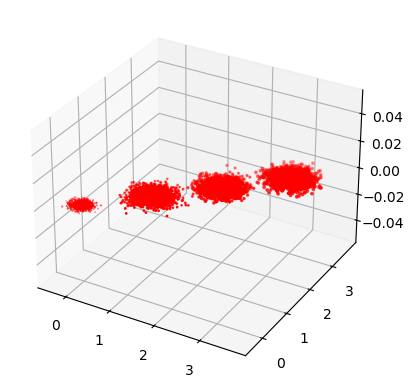

[0.98318212 0.00850037 0.00831751]
[3.78521638 0.03272613 0.03202212]


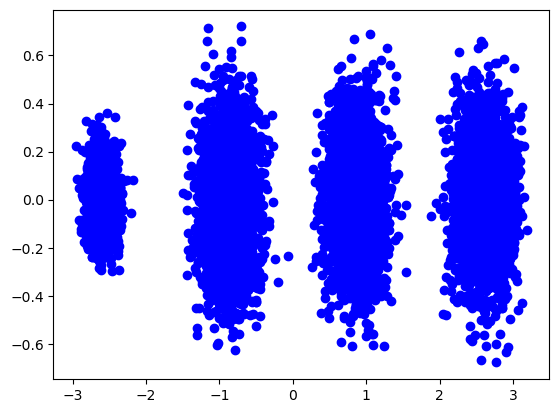

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 3D 画图模块
from mpl_toolkits.mplot3d import Axes3D
# 生成指定数据集模块
from sklearn.datasets import make_blobs
# 导入PCA模块
from sklearn.decomposition import PCA

pd.set_option('future.no_silent_downcasting', True)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.family'] = 'DejaVu Sans'

# 生成数据集：返回 x 数组维度[10000, 3],y[10000]
x, y = make_blobs(n_samples=10000, n_features=3,
                  centers=[[3, 3, 3], [0, 0, 0], [1, 1, 1], [2, 2, 2]],
                  cluster_std=[0.2, 0.1, 0.2, 0.2], random_state=9)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax = Axes3D(fig)   无法生成三维图
plt.scatter(x[:, 0], x[:, 1], x[:, 2], marker='o', c='r')
plt.show()

# 主成分分析
# n_components表示保留的特征数
pca = PCA(n_components=3)
pca.fit(x)

# explained_variance_ratio_,代表降维后的各主成分的方差值占总方差的比例
# 这个比例越大，则是越重要的主成分
print(pca.explained_variance_ratio_)

# explained_variance_, 代表降维后各主成分的方差值
# 方差值越大，则说明越是重要的主成分
print(pca.explained_variance_)

# 降维，从三维到二维
pca = PCA(n_components=2)
pca.fit(x)

# 降维、标准化、归一化操作
x_new = pca.transform(x)

plt.scatter(x_new[:, 0], x_new[:, 1], marker='o', c='b')
plt.show()

**生成了一个三维数据集，并尝试在三维空间中可视化。**  
**进行了两次 PCA 操作，第一次保持了 3 个主成分，第二次将数据降维到二维。**  
**通过 PCA，你可以观察到主成分的重要性，并最终将数据可视化为二维散点图。**  